In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread

sample_img = imread('resources/girl.jpg')

plt.imshow(sample_img)
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def median_cut_quantize(img, img_arr):
    # when it reaches the end, color quantize
    print("start quantize: ", len(img_arr))
    r_average = np.mean(img_arr[:,0])
    g_average = np.mean(img_arr[:,1])
    b_average = np.mean(img_arr[:,2])
    
    for data in img_arr:
        sample_img[data[3]][data[4]] = [r_average, g_average, b_average]
    
def split_into_buckets(img, img_arr, depth):
    
    if len(img_arr) == 0:
        return 
        
    if depth == 0:
        median_cut_quantize(img, img_arr)
        return
    
    r_range = np.max(img_arr[:,0]) - np.min(img_arr[:,0])
    g_range = np.max(img_arr[:,1]) - np.min(img_arr[:,1])
    b_range = np.max(img_arr[:,2]) - np.min(img_arr[:,2])
    
    space_with_highest_range = 0

    if g_range >= r_range and g_range >= b_range:
        space_with_highest_range = 1
    elif b_range >= r_range and b_range >= g_range:
        space_with_highest_range = 2
    elif r_range >= b_range and r_range >= g_range:
        space_with_highest_range = 0

    print("space_with_highest_range:",space_with_highest_range)

    # sort the image pixels by color space with highest range 
    # and find the median and divide the array.
    img_arr = img_arr[img_arr[:,space_with_highest_range].argsort()]
    median_index = int((len(img_arr)+1)/2)
    print("median_index:", median_index)

    
    #split the array into two blocks
    split_into_buckets(img, img_arr[0:median_index], depth-1)
    split_into_buckets(img, img_arr[median_index:], depth-1)
    
flattened_img_array = []
for rindex, rows in enumerate(sample_img):
    for cindex, color in enumerate(rows):
        flattened_img_array.append([color[0],color[1],color[2],rindex, cindex]) 
        
flattened_img_array = np.array(flattened_img_array)

split_into_buckets(sample_img, flattened_img_array, 7)

space_with_highest_range: 1
median_index: 120000
space_with_highest_range: 0
median_index: 60000
space_with_highest_range: 2
median_index: 30000
space_with_highest_range: 0
median_index: 15000
space_with_highest_range: 1
median_index: 7500
space_with_highest_range: 0
median_index: 3750
space_with_highest_range: 2
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 2
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 0
median_index: 3750
space_with_highest_range: 0
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 1
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 1
median_index: 7500
space_with_highest_range: 1
median_index: 3750
space_with_highest_range: 2
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 0
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 

space_with_highest_range: 2
median_index: 7500
space_with_highest_range: 0
median_index: 3750
space_with_highest_range: 2
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 2
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 1
median_index: 3750
space_with_highest_range: 0
median_index: 1875
start quantize:  1875
start quantize:  1875
space_with_highest_range: 0
median_index: 1875
start quantize:  1875
start quantize:  1875


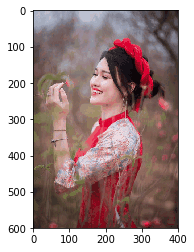

In [3]:
plt.imshow(sample_img)

In [4]:
from skimage.io import imsave

imsave('girl_reduced_128_colors.jpg', sample_img)